<a href="https://colab.research.google.com/github/manjuiitm/MLP/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Random Forest Algorithm in Machine Learning


Understanding Intuition for Random Forest Algorithm
Random Forest algorithm is a powerful tree learning technique in Machine Learning to make predictions and then we do voting of all the tress to make prediction. They are widely used for classification and regression task.

It is a type of classifier that uses many decision trees to make predictions.
It takes different random parts of the dataset to train each tree and then it combines the results by averaging them. This approach helps improve the accuracy of predictions. Random Forest is based on ensemble learning.
Imagine asking a group of friends for advice on where to go for vacation. Each friend gives their recommendation based on their unique perspective and preferences (decision trees trained on different subsets of data). You then make your final decision by considering the majority opinion or averaging their suggestions (ensemble prediction).

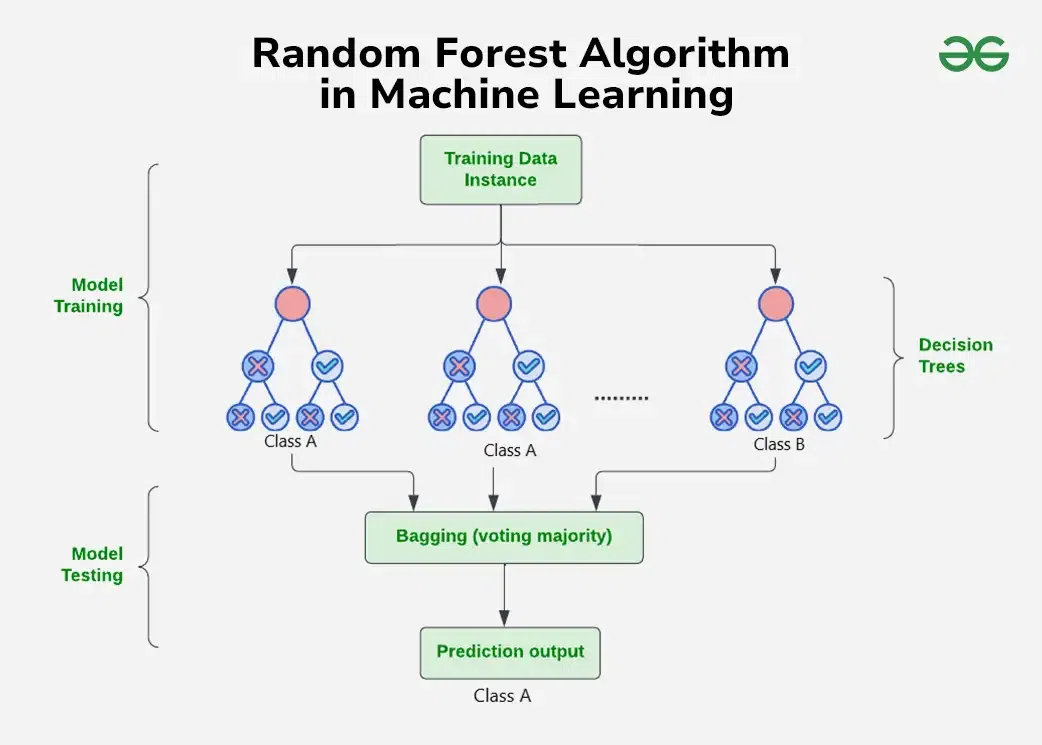

**As explained in image**: Process starts with a dataset with rows and their corresponding class labels (columns).

*   Then - Multiple Decision Trees are created from the training data. Each tree is trained on a random subset of the data (with replacement) and a random subset of features. This process is known as bagging or bootstrap aggregating.
*   Each Decision Tree in the ensemble learns to make predictions independently.
When presented with a new, unseen instance, each Decision Tree in the ensemble makes a prediction.
*   The final prediction is made by combining the predictions of all the Decision Trees. This is typically done through a majority vote (for classification) or averaging (for regression).

**Key Features of Random Forest**
**Handles Missing Data**: Automatically handles missing values during training, eliminating the need for manual imputation.
Algorithm ranks **features based on their importance in making predictions **offering valuable insights for feature selection and interpretability.
Scales Well with Large and Complex Data without significant performance degradation.
**Algorithm** is versatile and can be applied to both classification tasks (e.g., predicting categories) and regression tasks (e.g., predicting continuous values).
***How Random Forest Algorithm Works?***
The random Forest algorithm works in several steps:

Random Forest builds multiple decision trees using random samples of the data. Each tree is trained on a different subset of the data which makes each tree unique.

When creating each tree the algorithm randomly selects a subset of features or variables to split the data rather than using all available features at a time. This adds diversity to the trees.

Each decision tree in the forest makes a prediction based on the data it was trained on. When making final prediction random forest combines the results from all the trees.

For classification tasks the final prediction is decided by a majority vote. This means that the category predicted by most trees is the final prediction.
For regression tasks the final prediction is the average of the predictions from all the trees.

The randomness in data samples and feature selection helps to prevent the model from overfitting making the predictions more accurate and reliable.

***Assumptions of Random Forest***
Each tree makes its own decisions: Every tree in the forest makes its own predictions without relying on others.
Random parts of the data are used: Each tree is built using random samples and features to reduce mistakes.
Enough data is needed: Sufficient data ensures the trees are different and learn unique patterns and variety.
Different predictions improve accuracy: Combining the predictions from different trees leads to a more accurate final results.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Corrected URL for the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Drop rows with missing 'Survived' values
titanic_data = titanic_data.dropna(subset=['Survived'])

# Features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

# Encode 'Sex' column
X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

# Fill missing 'Age' values with the median
X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Sample prediction
sample = X_test.iloc[0:1]  # Keep as DataFrame to match model input format
prediction = rf_classifier.predict(sample)

# Retrieve and display the sample
sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Sample Passenger: {'Pclass': 3, 'Sex': 1, 'Age': 28.0, 'SibSp': 1, 'Parch': 1, 'Fare': 15.2458}
Predicted Survival: Did Not Survive


In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target

# Features and target variable
X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Sample Prediction
single_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_regressor.predict(single_data)
print(f"Predicted Value: {predicted_value[0]:.2f}")
print(f"Actual Value: {y_test.iloc[0]:.2f}")

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Predicted Value: 0.51
Actual Value: 0.48
Mean Squared Error: 0.26
R-squared Score: 0.81


***Advantages of Random Forest***

Random Forest provides very accurate predictions even with large datasets.

Random Forest can handle missing data well without compromising with accuracy.
It doesn’t require normalization or standardization on dataset.

When we combine multiple decision trees it reduces the risk of overfitting of the model.

***Limitations of Random Forest***

It can be computationally expensive especially with a large number of trees.

It’s harder to interpret the model compared to simpler models like decision trees.
